<a href="https://colab.research.google.com/github/isabelamchaves/Introdu-o-Ci-ncia-de-Dados/blob/main/06_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kNN - Classificação e Métricas de Avaliação




## 1. Introdução

Neste notebook, vamos explorar a implementação do algoritmo KNN e na avaliação de seu desempenho em problemas de classificação binária, utilizando dados sintéticos e métricas como matriz de confusão e curva ROC.

## 2. Importando as Bibliotecas

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set_style('whitegrid')

## 3. Criando um conjunto de dados sintético



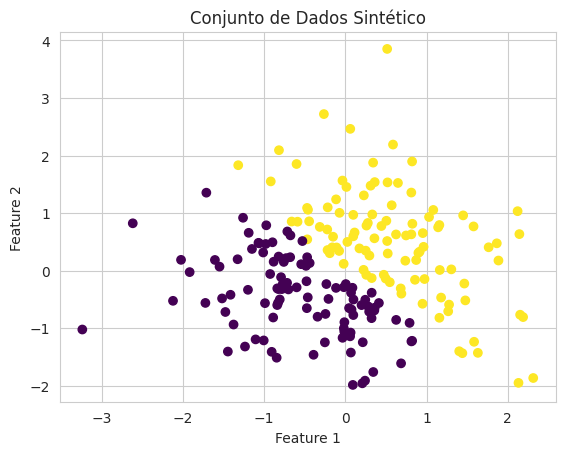

In [ ]:
# Gerando dados aleatórios para duas classes
np.random.seed(42)
X = np.random.randn(200, 2)
y = np.where(X[:,0] + X[:,1] > 0, 1, 0)

# Visualizando os dados
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Conjunto de Dados Sintético')
plt.show()

## 4. Dividindo o conjunto de dados em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Treinamento do modelo kNN






In [ ]:
# Escolhendo um valor inicial para k
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 6. Predição e Avaliação

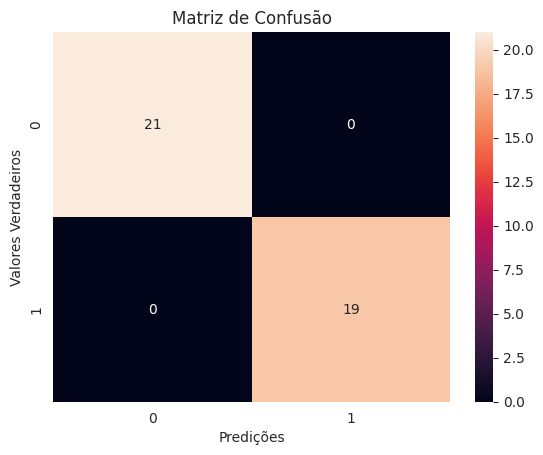

In [ ]:
# Fazendo as predições
y_pred = knn.predict(X_test)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

### Curva ROC

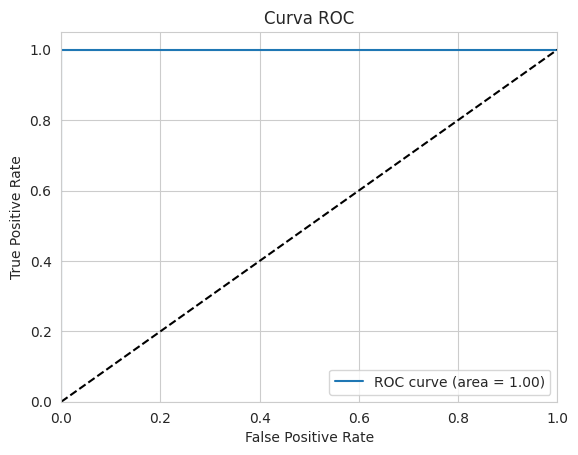

In [ ]:
# Curva ROC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## 7. Análise do Erro em Função de k


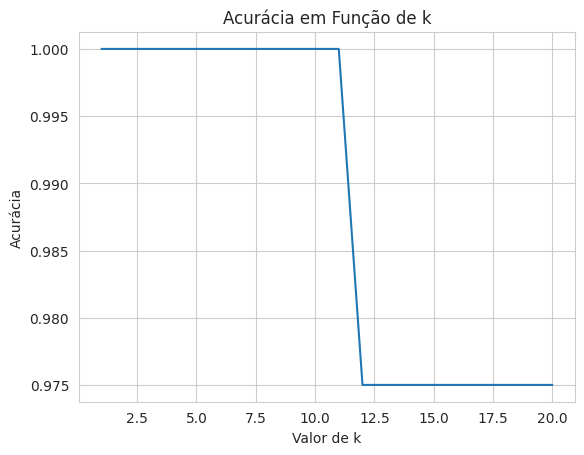

In [ ]:
# Variando o valor de k
k_range = range(1, 21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))

# Plotando o gráfico do erro em função de k
plt.plot(k_range, scores)
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.title('Acurácia em Função de k')
plt.show()

## 8. Fronteira de Decisão

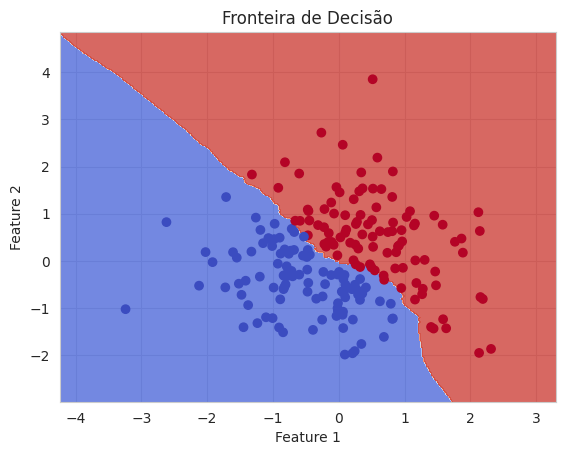

In [ ]:
# Criando uma malha para plotar a fronteira de decisão
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predizendo as classes para cada ponto da malha
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a fronteira de decisão
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fronteira de Decisão')
plt.show()

## 9. Conclusão

Este notebook demonstra a aplicação do algoritmo kNN em um problema de classificação binária. Exploramos a importância de métricas como matriz de confusão, curva ROC e a escolha do parâmetro k. A fronteira de decisão visualiza como o modelo separa as duas classes.